In [1]:
# from google.colab import files, drive

In [2]:
# up = files.upload()

In [3]:
# drive.mount('/content/drive')

## import dataset

In [11]:
import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/Neural_Network/ANN_course/Kaviani/3-cardio_train1.csv')
data = pd.read_csv('3-cardio_train1.csv')
data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [13]:
# data.info()

In [17]:
print(data['cardio'].unique())

[0 1]


## cleaning

In [7]:
# data.isna().sum()

## encoding

In [8]:
# encode the data

## define x, y

In [19]:
import numpy as np
x = data.iloc[:, 1:-1].values
x[:3]

array([[1.8393e+04, 2.0000e+00, 1.6800e+02, 6.2000e+01, 1.1000e+02,
        8.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0228e+04, 1.0000e+00, 1.5600e+02, 8.5000e+01, 1.4000e+02,
        9.0000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8857e+04, 1.0000e+00, 1.6500e+02, 6.4000e+01, 1.3000e+02,
        7.0000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [21]:
y = data.iloc[:, -1]
y = pd.get_dummies(y).values
y[:3]

array([[ True, False],
       [False,  True],
       [False,  True]])

## spliting

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [26]:
x_train[:3]

array([[1.9687e+04, 1.0000e+00, 1.6800e+02, 7.5000e+01, 1.2000e+02,
        8.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0602e+04, 1.0000e+00, 1.6600e+02, 6.2000e+01, 1.3000e+02,
        8.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.3337e+04, 1.0000e+00, 1.5600e+02, 1.0000e+02, 1.1000e+02,
        7.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [34]:
x_train.shape

(52500, 11)

In [28]:
y_train[:3]

array([[ True, False],
       [ True, False],
       [ True, False]])

## scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

In [38]:
x_train[:3]

array([[0.68826945, 0.        , 0.57948718, 0.29775281, 0.01836158,
        0.00727273, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.75911731, 0.        , 0.56923077, 0.2247191 , 0.0190678 ,
        0.00727273, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.97088657, 0.        , 0.51794872, 0.43820225, 0.01765537,
        0.00636364, 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [40]:
x_train[0].shape

(11,)

## create, compile and fit the model

### Sequential

In [42]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [44]:
model = Sequential([
    Input(shape=x_train[0].shape),    # (11,)
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(30, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,192 (8.56 KB)

 Trainable params: 2,192 (8.56 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(
    optimizer='adam',                   # tf.keras.optimizers.Adam()
    loss='categorical_crossentropy',    # tf.keras.losses.CategoricalCrossentropy()
    metrics=['accuracy']                # [tf.keras.metrics.CategoricalAccuracy()]
)

In [69]:
r = model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test),
    batch_size=500
)

Epoch 1/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7224 - loss: 0.5593 - val_accuracy: 0.7287 - val_loss: 0.5523
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7166 - loss: 0.5661 - val_accuracy: 0.7322 - val_loss: 0.5481
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.5629 - val_accuracy: 0.7302 - val_loss: 0.5507
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7198 - loss: 0.5625 - val_accuracy: 0.7209 - val_loss: 0.5603
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7164 - loss: 0.5653 - val_accuracy: 0.7334 - val_loss: 0.5485
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7185 - loss: 0.5622 - val_accuracy: 0.7336 - val_loss: 0.5497
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7188 - loss: 0.5640 - val_accuracy: 0.7306 - val_loss: 0.5495
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7224 - loss: 0.5604 - val_accuracy: 0.

### Functional API

In [51]:
# from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
# from tensorflow.keras.models import Model
# from tensorflow.keras import regularizers

In [52]:
# i = Input(shape=x_train[0].shape)
# X = Dense(11, activation='relu')(i)
# X = Dense(30, activation='relu')(X)
# X = Dense(2, activation='softmax')(X)

# model = Model(i, X)

In [53]:
# model.summary()

## visualizing

In [55]:
import matplotlib.pyplot as plt

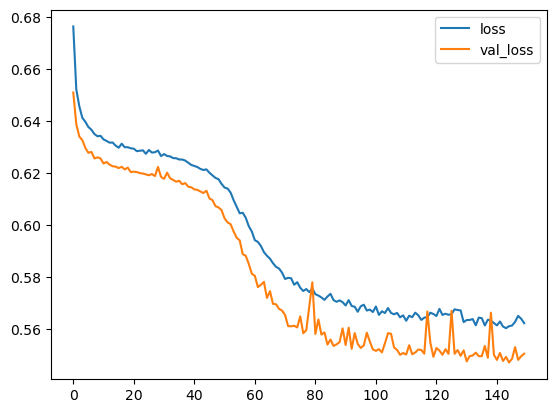

In [56]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

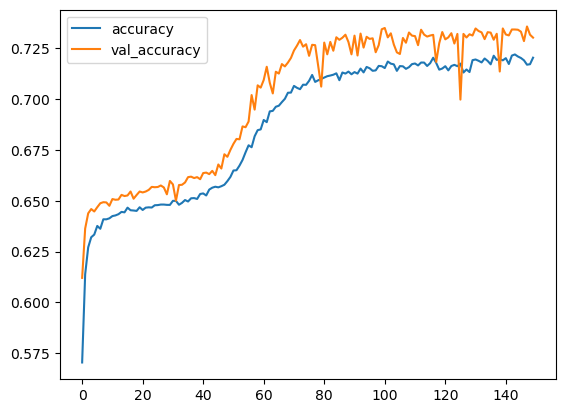

In [57]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## predict new data

In [67]:
print(y_test[0])
print(model.predict(x_test)[0])
print('-------------------')
print(np.argmax(model.predict(x_test)[0]))

[False  True]
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0.1748831  0.82511693]
-------------------
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1


## save the model

In [29]:
# model.save('MLP_categorical.keras')

## load the model

In [30]:
# from tensorflow.keras.models import load_model
# model = load_model('MLP_categorical.keras')